In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\tp_1_ej_2.txt',
    delimiter = '\t',
    decimal = ','
    )
datos.head()

,Dia,T
0,13/11,13.4
1,14/11,15.4
2,15/11,16.1
3,16/11,18.5
4,17/11,19.0


In [4]:
temperatura_base = 14
unidades_calor = datos['T'].sub(temperatura_base)
unidades_calor = unidades_calor.replace(
    unidades_calor[unidades_calor < 0],
    0
    )
unidades_calor.head()

0    0.0
1    1.4
2    2.1
3    4.5
4    5.0
Name: T, dtype: float64

In [5]:
tiempo_termico = unidades_calor.cumsum()
tiempo_termico.head()

0     0.0
1     1.4
2     3.5
3     8.0
4    13.0
Name: T, dtype: float64

Text(0.5, 0, 'Dias')

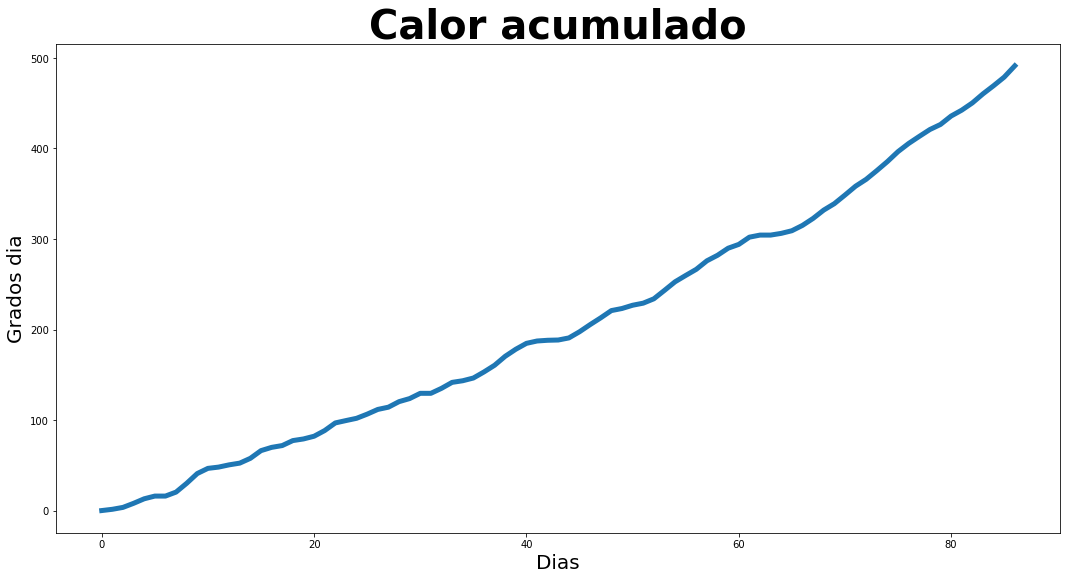

In [6]:
plt.figure(figsize = (18, 9))
plt.plot(tiempo_termico, linewidth=5)
plt.title("Calor acumulado",
          fontsize=40,
          fontweight='bold')
plt.ylabel("Grados dia", fontsize=20)
plt.xlabel("Dias", fontsize=20)

In [36]:
def tasa_llenado(T):
    if T<35 and T>6:
        tasa = 9 * (1 - 0.0025*(T-26)**2)
    else:
        tasa = 0
    return tasa

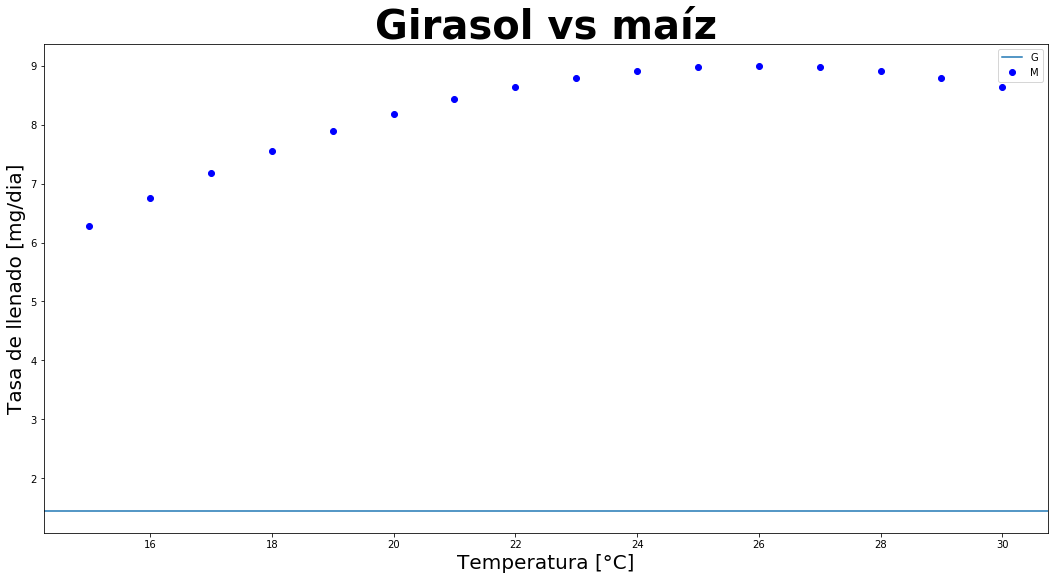

In [33]:
temperaturas = list(range(15,31))
plt.figure(figsize = (18, 9))
plt.title("Girasol vs maíz",
          fontsize=40,
          fontweight='bold')
plt.ylabel("Tasa de llenado [mg/dia]", fontsize=20)
plt.xlabel("Temperatura [°C]", fontsize=20)
plt.axhline(1.45)
for i in temperaturas:
    plt.plot(i,
             tasa_llenado(i),
             'bo')
plt.legend('GM')

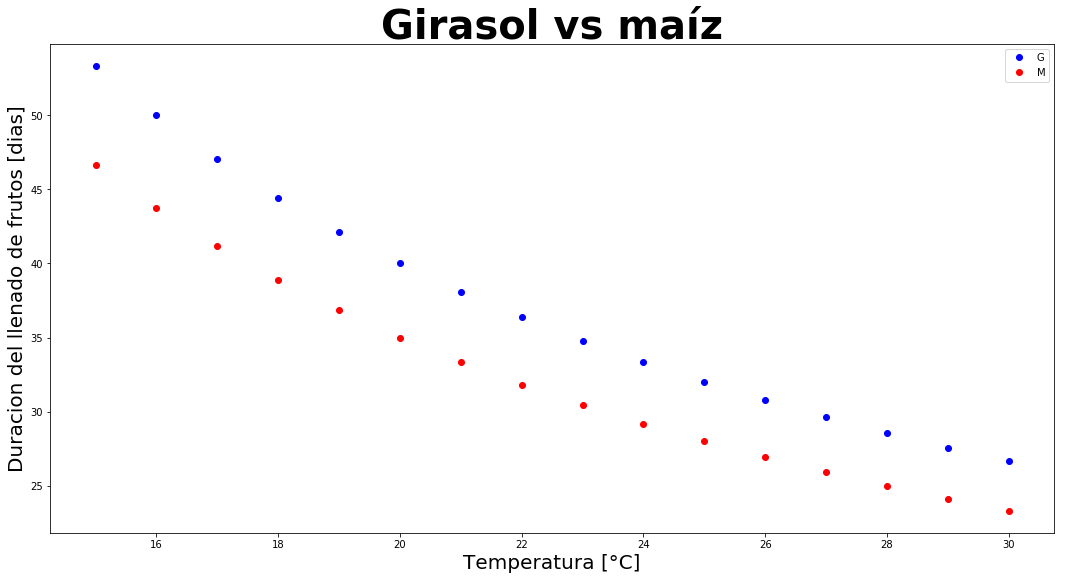

In [34]:
plt.figure(figsize = (18, 9))
plt.title("Girasol vs maíz",
          fontsize=40,
          fontweight='bold')
plt.ylabel("Duracion del llenado de frutos [dias]", fontsize=20)
plt.xlabel("Temperatura [°C]", fontsize=20)
for i in temperaturas:
    duracion_girasol = 800/i
    duracion_maiz = 700/i
    plt.plot(i,
             duracion_girasol,
             'bo')
    plt.plot(i,
             duracion_maiz,
             'ro')
plt.legend('GM')

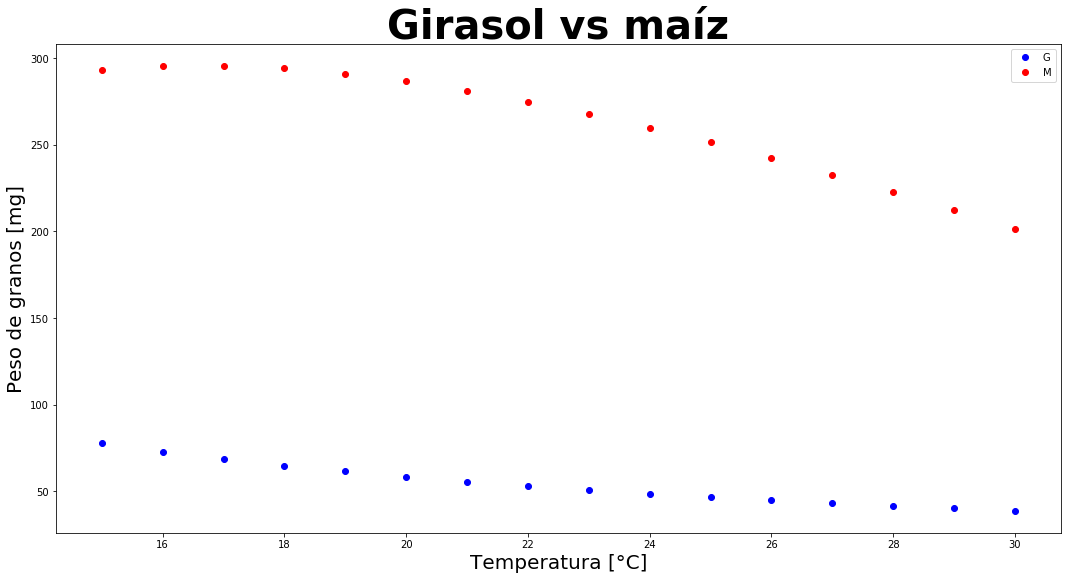

In [35]:
plt.figure(figsize = (18, 9))
plt.title("Girasol vs maíz",
          fontsize=40,
          fontweight='bold')
plt.ylabel("Peso de granos [mg]", fontsize=20)
plt.xlabel("Temperatura [°C]", fontsize=20)
for i in temperaturas:
    duracion_girasol = 800/i
    duracion_maiz = 700/i
    peso_girasol = duracion_girasol*1.46
    peso_maiz = duracion_maiz*tasa_llenado(i)
    plt.plot(i,
             peso_girasol,
             'bo')
    plt.plot(i,
             peso_maiz,
             'ro')
plt.legend('GM')

In [37]:
def acido_oleico(Tmin):
    if Tmin<21.84:
        oleico = -23.1  + 3.4*(Tmin+0.9)
    else:
        oleico = 54.2
    return oleico

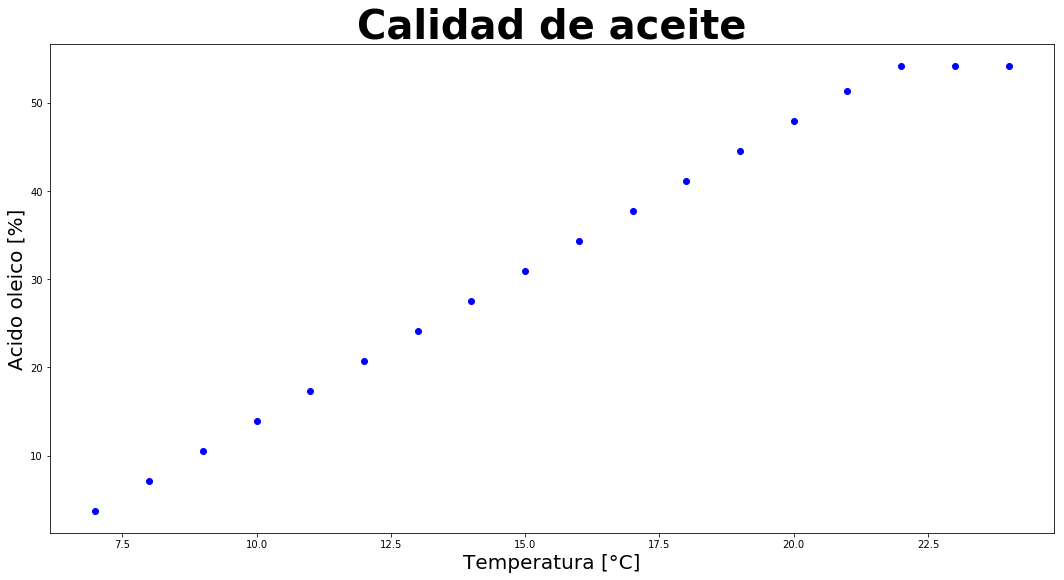

In [39]:
temperaturas_ol = list(range(7,25))
plt.figure(figsize = (18, 9))
plt.title("Calidad de aceite",
          fontsize=40,
          fontweight='bold')
plt.ylabel("Acido oleico [%]", fontsize=20)
plt.xlabel("Temperatura [°C]", fontsize=20)
for i in temperaturas_ol:
    plt.plot(i,
             acido_oleico(i),
             'bo')